In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

In [2]:
df = pd.read_csv(r"C:\Users\Suwani Gunasekara\OneDrive\Documents\Sem 7 ML\winequality-white_onezero.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


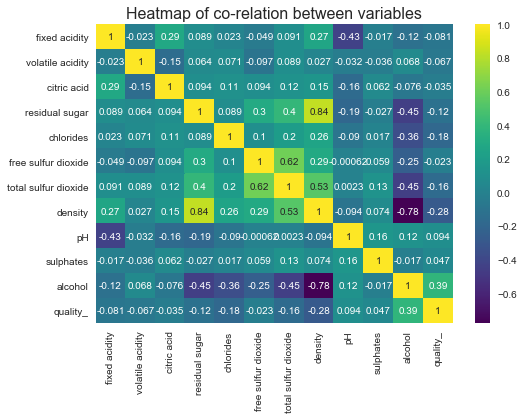

In [6]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

In [7]:
df.drop('density', inplace=True, axis=1)
df.drop('residual sugar', inplace=True, axis=1)

In [8]:
# add a ones column - this makes the matrix multiplication work out easier
#df.insert(0, 'Ones', 1)
cols = df.shape[1]
Xdata = df.iloc[:,0:cols-1]
ydata = df.iloc[:,cols-1:cols]

In [9]:
cols 

10

In [10]:
# Normalizing
data= (Xdata - Xdata.mean()) / Xdata.std()
data.describe()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
count,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03
mean,2.653755e-14,-1.053431e-14,5.344610e-14,-1.419036e-15,6.210721e-18,-1.387439e-16,1.316599e-14,-1.280696e-14,-3.164485e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.619982e+00,-1.966784e+00,-2.761461e+00,-1.683102e+00,-1.958477e+00,-3.043919e+00,-3.101091e+00,-2.364468e+00,-2.043089e+00
25%,-6.574340e-01,-6.770318e-01,-5.304215e-01,-4.472890e-01,-7.237012e-01,-7.144009e-01,-6.507699e-01,-6.996389e-01,-8.241915e-01
50%,-6.492444e-02,-1.809733e-01,-1.172660e-01,-1.268931e-01,-7.691388e-02,-1.026084e-01,-5.474574e-02,-1.739035e-01,-9.285319e-02
75%,5.275851e-01,4.142970e-01,4.611517e-01,1.935028e-01,6.286722e-01,6.738976e-01,6.075033e-01,5.270772e-01,7.197450e-01
max,8.704217e+00,8.152811e+00,1.095530e+01,1.374167e+01,1.491679e+01,7.097720e+00,4.183648e+00,5.171074e+00,2.995020e+00


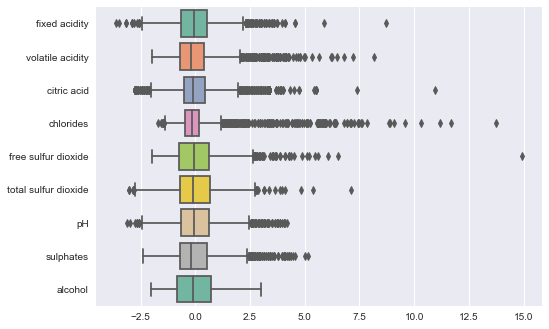

In [11]:
ax = sns.boxplot(data=data, orient="h", palette="Set2")

In [12]:
frames = [data,ydata]
dfxy = pd.concat(frames, axis = 1)
dfxy.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality_
0,0.172079,-0.081762,0.213258,-0.035351,0.569873,0.744489,-1.246794,-0.349149,-1.393010,0
1,-0.657434,0.215874,0.047996,0.147732,-1.252891,-0.149669,0.739953,0.001342,-0.824192,0
2,1.475600,0.017450,0.543783,0.193503,-0.312109,-0.973236,0.475053,-0.436771,-0.336633,0
3,0.409083,-0.478608,-0.117266,0.559670,0.687471,1.120977,0.011479,-0.787262,-0.499152,0
4,0.409083,-0.478608,-0.117266,0.559670,0.687471,1.120977,0.011479,-0.787262,-0.499152,0


In [13]:
df_ = dfxy[(np.absolute(dfxy) <3).all(axis=1)]

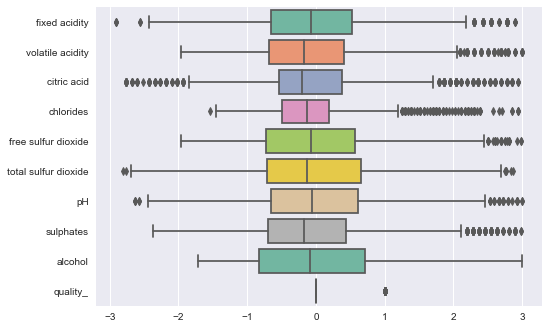

In [14]:
ax = sns.boxplot(data=df_, orient="h", palette="Set2")

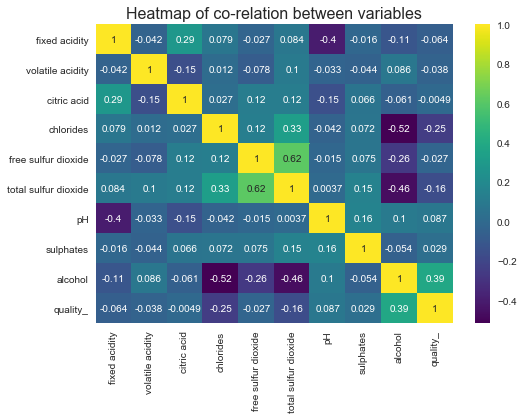

In [15]:
sns.heatmap(df_.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

In [31]:
#df_.drop('residual sugar', inplace=True, axis=1)

In [23]:
# add a ones column - this makes the matrix multiplication work out easier
#df_.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = df_.shape[1]
X = df_.iloc[:,0:cols-1]
y = df_.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(10)

In [24]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [25]:
# This is the error function. We need to minimize this
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [26]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [27]:
gradient(theta, X, y)

array([ 0.27356398,  0.0203796 , -0.00442904, -0.01559568,  0.0228174 ,
        0.00254583,  0.06076036, -0.03491443, -0.02214588, -0.15560532])

In [28]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-1.62097926e+00,  6.84119048e-02, -2.66603956e-01, -3.70054086e-04,
        -4.62076367e-01,  2.74935137e-01, -7.51610815e-02,  1.82958868e-01,
         1.25643145e-01,  9.63906094e-01]),
 28,
 1)

In [29]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [30]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) / len(correct))
print (accuracy)

0.7957418496340652
